# Practice Lab: Simulating Random Variables in R


Maria Oros

## Lab Overview:

In this lab, you will explore various methods to simulate random variables using the Acceptance-Rejection technique in R. The tasks will guide you through implementing functions for different probability distributions, analyzing the results, and estimating statistical properties. By the end of this lab, you will have a better understanding of random variable simulation and error quantification.

## Lab Objective:

- Implement the Acceptance-Rejection method for random variable simulation.
- Analyze simulated distributions and calculate their statistical properties.
- Quantify the error between simulated distributions and theoretical curves.
- Estimate the value of π using simulation techniques.

## Lab Outline:

1. **Task 1:** Acceptance-Rejection Simulation for Standard Normal Distribution
2. **Task 2:** Acceptance-Rejection Simulation for Custom Distribution
3. **Task 3:** Simulating Random Variable from Beta Distribution
4. **Task 4:** Estimating π

> **Note:** Before proceeding with the task problems, ensure that you have sourced the `stattools Module10.R` file. Loading the `stattools Module10.R` file may take some time, as it includes multiple packages. Please be patient while all packages load successfully. This **.R** file is already preloaded in the environment, so you can run the **below cell** directly to access all required packages.

In [1]:
source("stattools Module10.R")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘multcomp’, ‘RUnit’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘cpp11’, ‘matrixStats’, ‘igraph’, ‘gridBase’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘libcoin’, ‘inum’, ‘rlang’, ‘viridisLite’, ‘visNetwork’, ‘Formula’, ‘ape’, ‘networkD3’, ‘treemap’, ‘party’, ‘partykit’, ‘doParallel’, ‘DiagrammeR’, ‘mockery’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘lazyeval’, ‘rex’, ‘Cairo’, ‘covr’, ‘gridGraphics’, ‘magick’, ‘maps’, ‘PASWR’, ‘vdiffr’


Warning message

> **Note:** If any warning messages appear, you can safely ignore them and continue with the lab. They do not affect the execution of the lab or the generation of outputs; the codes will still run correctly. 

### Task 1: Acceptance-Rejection Simulation for Standard Normal Distribution

**Problem:** Write an R function that uses the Acceptance-Rejection method to simulate random variables from a standard normal distribution. Ensure that the function checks if the input density function is valid. The function should plot both the density function and the proposal function together.

> Use the standard normal distribution as the input. Summarize your distribution using the summary command in R. Calculate the mean and standard deviation of your simulated distribution. Generate 10 random numbers from your distribution. Plot the normal distribution curve and the histogram output of your function together on the same graph. Finally, quantify the error between the two distributions using the trapezoid method.

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-4.464692 -0.676832 -0.023540 -0.008516  0.668190  3.642940 


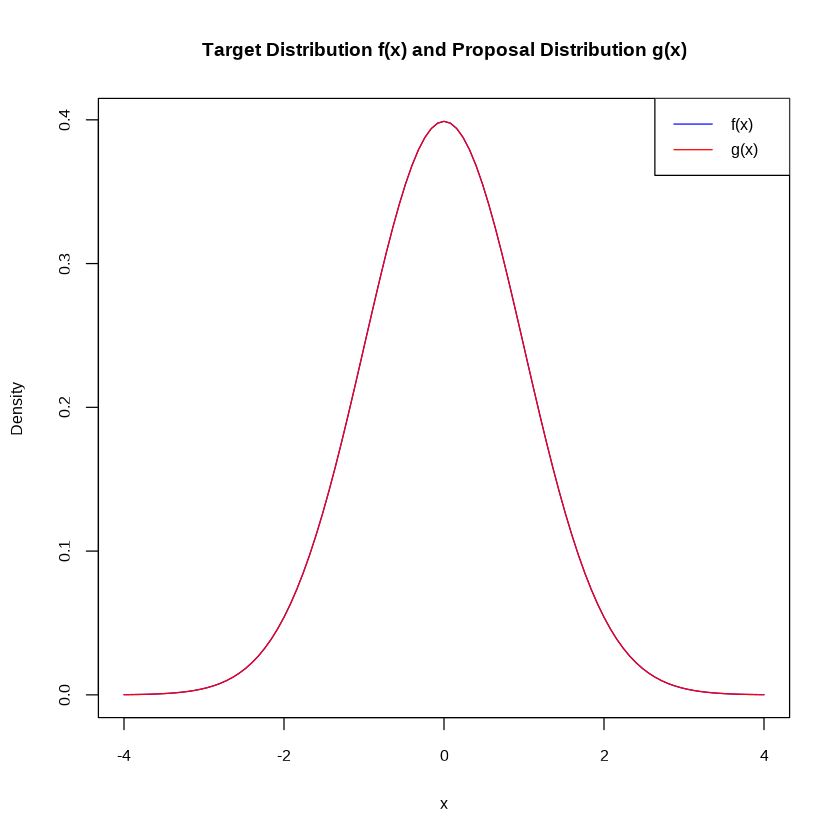

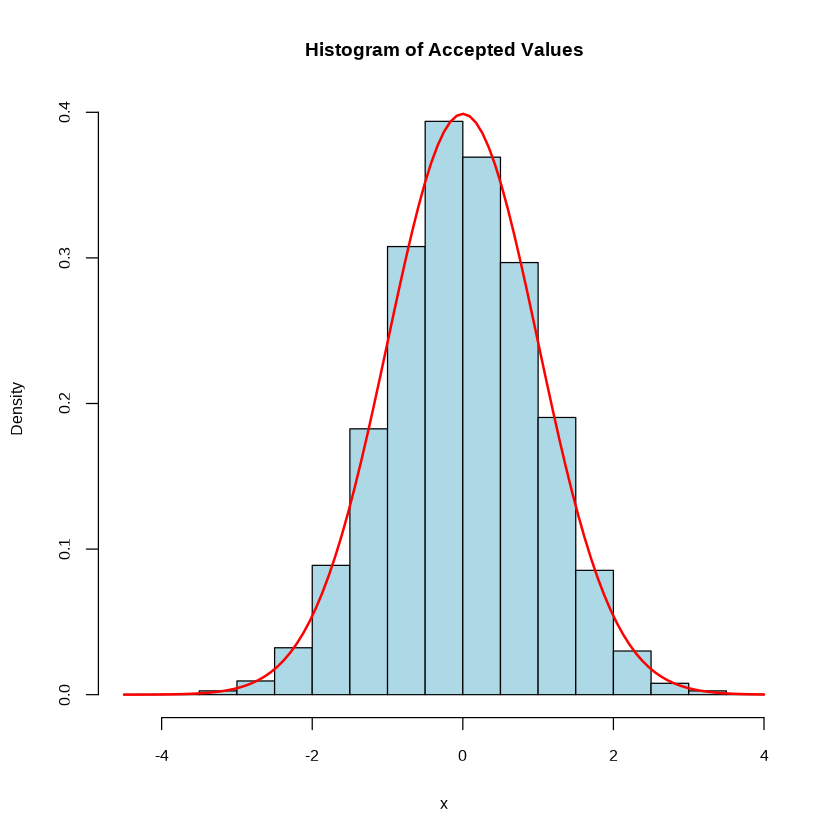

In [2]:
simulate_normal <- function(n) {
  
  # Define the target distribution f(x) (standard normal distribution)
  f <- function(x) {
    return(dnorm(x, mean = 0, sd = 1))  # standard normal density function
  }
  
  # Define the proposal distribution g(x) as a standard normal distribution
  g <- function(x) {
    return(dnorm(x, mean = 0, sd = 1))  # also a standard normal density function
  }
  
  # Plot f(x) and g(x)
  curve(f(x), from = -4, to = 4, col = "blue", main = "Target Distribution f(x) and Proposal Distribution g(x)", xlab = "x", ylab = "Density")
  curve(g(x), from = -4, to = 4, col = "red", add = TRUE)
  legend("topright", legend = c("f(x)", "g(x)"), col = c("blue", "red"), lty = 1)

  # Acceptance-Rejection Sampling
  accepted_values <- c()
  for (i in 1:n) {
    repeat {
      # Sample from g(x) (proposal distribution)
      x <- rnorm(1, mean = 0, sd = 1)
      
      # Generate a uniform random number for acceptance-rejection
      u <- runif(1)
      
      # Compute the acceptance probability
      if (u <= f(x) / g(x)) {
        accepted_values <- c(accepted_values, x)
        break
      }
    }
  }

  # Summary of the sampled distribution
  summary_values <- summary(accepted_values)
  print(summary_values)

  # Plot the histogram of accepted values and overlay the normal curve
  hist(accepted_values, probability = TRUE, main = "Histogram of Accepted Values", xlab = "x", col = "lightblue", border = "black", breaks = 20)
  curve(dnorm(x, mean = 0, sd = 1), add = TRUE, col = "red", lwd = 2)
  
  # Return the accepted values
  return(accepted_values)
}

# Run the function to simulate 10,000 random values from the normal distribution
simulated_values <- simulate_normal(10000)


### Task 2: Acceptance-Rejection Simulation for Custom Distribution

**Problem:** Repeat the process from Task 1 using the probability distribution function:

$$
f(x)=30(x^2-2x^3+x^4) ~~~~~0<x<1
$$

Show that the $g(x)>f(x)$ and summarize your distribution. Plot the distribution curve and histogram, then quantify the error using the trapezoid method.

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


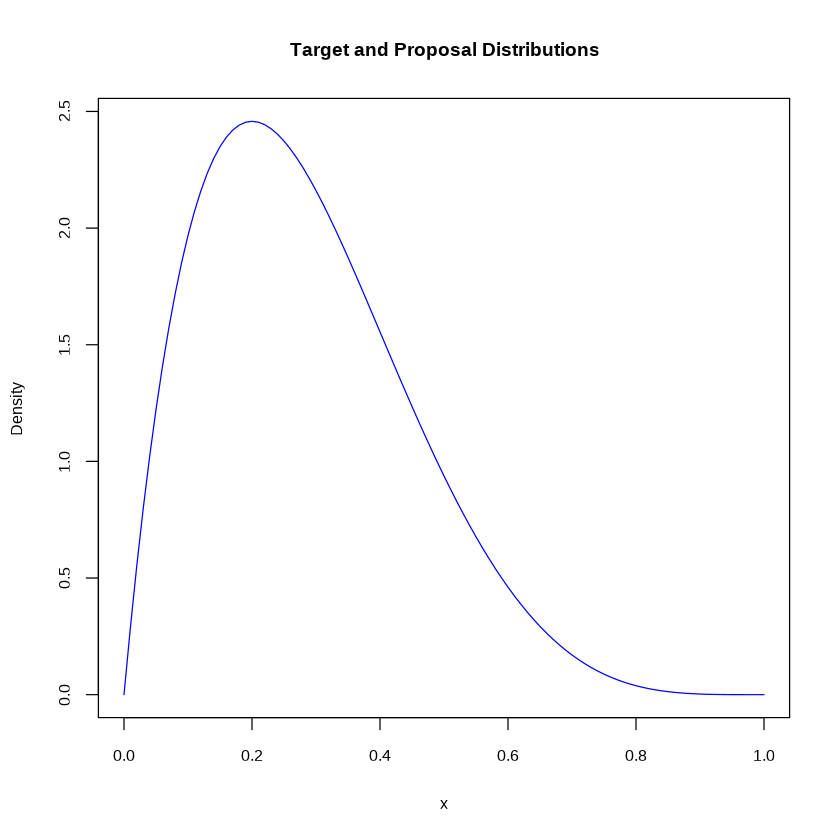

In [3]:
simulate_custom <- function(n) {
  
  # Define the target distribution f(x) as Beta(2, 5)
  f <- function(x) {
    dbeta(x, 2, 5)
  }
  
  # Define the proposal distribution g(x) as a uniform distribution on (0, 1)
  g <- function(x) {
    1  # Uniform distribution on (0, 1) has a constant value of 1
  }
  
  # Plot f(x) and g(x)
  x_vals <- seq(0, 1, by = 0.01)
  plot(x_vals, f(x_vals), type = "l", col = "blue", ylab = "Density", xlab = "x", main = "Target and Proposal Distributions")
  lines(x_vals, g(x_vals), col = "red", lty = 2)
  
  # Acceptance-Rejection Sampling
  accepted_values <- c()
  for (i in 1:n) {
    repeat {
      # Sample from g(x) (proposal distribution) which is uniform on (0, 1)
      x <- runif(1, 0, 1)
      
      # Generate a uniform random number for acceptance-rejection
      u <- runif(1)
      
      # Compute the acceptance probability
      if (u <= f(x) / g(x)) {
        accepted_values <- c(accepted_values, x)
        break
      }
    }
  }
  
  # Summary of the sampled distribution
  cat("Number of accepted values:", length(accepted_values), "\n")
  cat("Mean of accepted values:", mean(accepted_values), "\n")
  cat("Standard deviation of accepted values:", sd(accepted_values), "\n")
  
  # Plot the histogram of accepted values and overlay the true curve
  hist(accepted_values, probability = TRUE, col = rgb(0, 0, 1, 0.5), xlab = "x", main = "Histogram of Accepted Samples")
  lines(x_vals, f(x_vals), col = "blue", lwd = 2)
  
  # Return the accepted values
  return(accepted_values)
}

# Run the function to simulate 10 random values from the custom distribution
set.seed(42)  # For reproducibility
accepted_values <- simulate_custom(10)


<details>
    <summary>Click here to view/hide the solution.</summary>
    
```r
    
simulate_custom <- function(n) {
  
  # Define the target distribution f(x) as per the problem
  f <- function(x) {
    30 * (x^2 - 2 * x^3 + x^4)
  }
  
  # Define the proposal distribution g(x) as a uniform distribution on (0, 1)
  g <- function(x) {
    rep(1, length(x))  # Uniform distribution on (0, 1) has constant density of 1
  }
  
  # Plot f(x) and g(x)
  curve(f, from = 0, to = 1, col = "red", lwd = 2, ylab = "Density", main = "f(x) and g(x) Comparison")
  curve(g, from = 0, to = 1, add = TRUE, col = "blue", lwd = 2)
  
  legend("topright", legend = c("f(x) - Target", "g(x) - Proposal"), col = c("red", "blue"), lwd = 2)
  
  # Acceptance-Rejection Sampling
  accepted_values <- c()
  for (i in 1:n) {
    repeat {
      # Sample from g(x) (proposal distribution) which is uniform on (0, 1)
      x <- runif(1, 0, 1)
      
      # Generate a uniform random number for acceptance-rejection
      u <- runif(1)
      
      # Compute the acceptance probability
      if (u <= f(x) / g(x)) {
        accepted_values <- c(accepted_values, x)
        break
      }
    }
  }
  
  # Summary of the sampled distribution
  print(summary(accepted_values))
  
  # Plot the histogram of accepted values and overlay the true curve
  hist(accepted_values, probability = TRUE, col = "lightblue", main = "Histogram of Simulated Custom Distribution", xlab = "Value")
  curve(f, from = 0, to = 1, add = TRUE, col = "red", lwd = 2)  # Overlay the target distribution
  
  # Return the accepted values
  return(accepted_values)
}

# Run the function to simulate 10 random values from the custom distribution
simulate_custom(10)
    
```
</details>

### Task 3: Simulating Random Variable from Beta Distribution

**Problem:** Write a function to simulate a random variable from the beta distribution using the Acceptance-Rejection method. The function should accept $\alpha$ and $\beta$ parameters, output a random value, and compare it with theoretical values.

Number of accepted values: 1000 
Mean of accepted values: 0.2966206 
Standard deviation of accepted values: 0.163731 


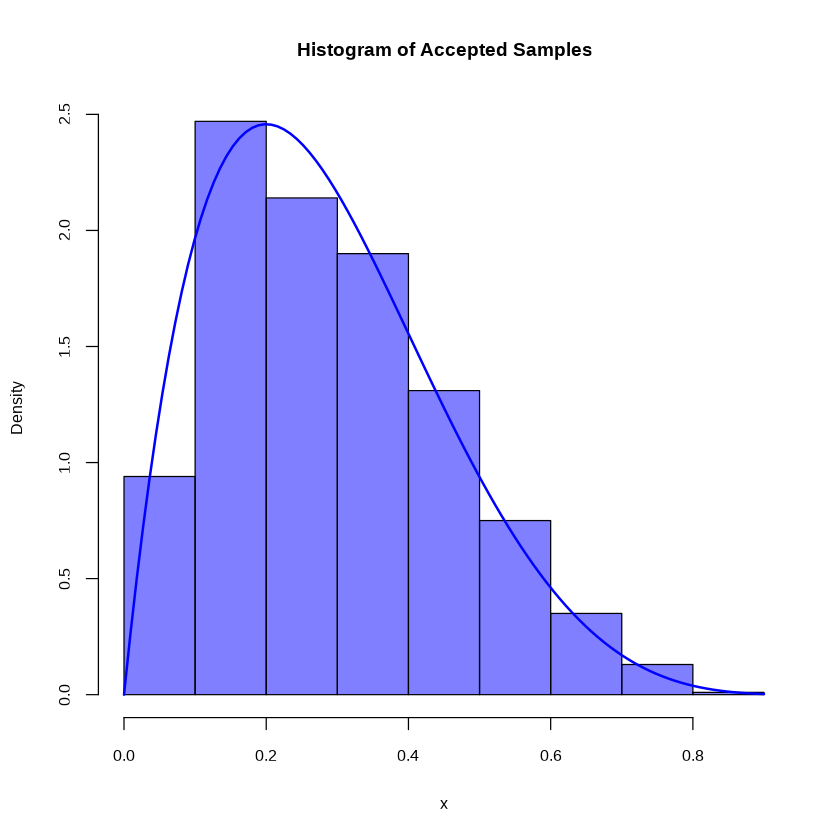

In [5]:
simulate_beta <- function(alpha, beta, n) {
  # Define the target density function (Beta distribution)
  f <- function(x) dbeta(x, shape1 = alpha, shape2 = beta)
  
  # Define the proposal function (uniform distribution on [0, 1])
  g <- function(x) 1  # Uniform proposal function, constant value 1
  
  # Maximum value of f(x) to scale the acceptance probability
  M <- max(f(seq(0, 1, by = 0.01)))  # The maximum value of f(x) on [0, 1]
  
  # Acceptance-Rejection Sampling
  accepted_values <- c()
  for (i in 1:n) {
    repeat {
      # Sample from g(x) (proposal distribution) which is uniform on (0, 1)
      x <- runif(1, 0, 1)
      
      # Generate a uniform random number for acceptance-rejection
      u <- runif(1)
      
      # Compute the acceptance probability
      if (u <= f(x) / (M * g(x))) {
        accepted_values <- c(accepted_values, x)
        break
      }
    }
  }
  
  # Summarizing the distribution
  cat("Number of accepted values:", length(accepted_values), "\n")
  cat("Mean of accepted values:", mean(accepted_values), "\n")
  cat("Standard deviation of accepted values:", sd(accepted_values), "\n")
  
  # Plot the histogram of accepted values and overlay the true Beta distribution
  hist(accepted_values, probability = TRUE, col = rgb(0, 0, 1, 0.5), xlab = "x", main = "Histogram of Accepted Samples")
  curve(f(x), col = "blue", add = TRUE, lwd = 2)
  
  # Return the accepted values
  return(accepted_values)
}

# Example usage: Simulate 1000 random values from a Beta(2, 5) distribution
set.seed(42)  # For reproducibility
accepted_values <- simulate_beta(2, 5, 1000)


### Task 4: Estimating π

**Problem:** Write an R program to simulate the estimation of $\pi$ using the Monte Carlo method. The simulation involves generating random points in a square that bounds a quarter circle and calculating the ratio of points that fall within the quarter circle to the total number of points. Your program should run enough simulations to achieve an estimate of $\pi$ with at least 8 correct significant digits. The output should display the estimated value of $\pi$ and the total number of points used in the simulation.

In [6]:
estimate_pi <- function(n) {
  # Generate n random points in the unit square [0, 1] x [0, 1]
  x <- runif(n)
  y <- runif(n)

  # Calculate the number of points that fall inside the quarter circle
  inside_circle <- sum(x^2 + y^2 <= 1)
  
  # Estimate pi using the ratio of points inside the quarter circle
  pi_estimate <- 4 * inside_circle / n
  
  # Output the estimated value of pi and the total number of points
  return(list(estimated_pi = pi_estimate, total_points = n))
}

# Set the number of points for the simulation
num_points <- 1000000  # You can increase this number for a more accurate estimate

# Call the function and print the result
result <- estimate_pi(num_points)
cat("Estimated value of pi:", result$estimated_pi, "\n")
cat("Total number of points:", result$total_points, "\n")


Estimated value of pi: 3.140272 
Total number of points: 1e+06 


<details>
    <summary>Click here to view/hide the solution.</summary>
    
```r
    
# Function to estimate pi using Monte Carlo simulation
estimate_pi <- function(n) {
  # Generate n random points in the unit square [0, 1] x [0, 1]
  x <- runif(n)
  y <- runif(n)

  # Calculate the number of points that fall inside the quarter circle
  inside_circle <- sum((x^2 + y^2) <= 1)

  # Estimate pi
  pi_estimate <- (inside_circle / n) * 4
  
  # Output the estimated value of pi and the total number of points
  return(list(estimated_pi = pi_estimate, total_points = n))
}

# Set the number of points for the simulation
num_points <- 1000000  # You can increase this number for a more accurate estimate

# Call the function and print the result
result <- estimate_pi(num_points)
cat("Estimated value of pi:", result$estimated_pi, "\n")
cat("Total number of points used:", result$total_points, "\n")
    
```
</details>

## Lab Summary:

This lab focused on simulating random variables using R, specifically implementing the Acceptance-Rejection method for various probability distributions. The first task involved simulating random variables from the standard normal distribution, where you validated the density function and compared the simulated results against the theoretical curve. The second task extended this approach to a custom polynomial distribution, enabling further exploration of statistical properties. In the third task, the Acceptance-Rejection method was adapted to simulate random variables from a beta distribution, showcasing the flexibility of the method across different distributions. Finally, the lab culminated in an exploration of random simulations to estimate $\pi$, demonstrating the practical applications of probability theory and random sampling techniques.

## Key Takeaways:

- Implementing the Acceptance-Rejection method enhances understanding of random variable simulation.
- Visualization techniques are essential for comparing simulated distributions to theoretical models.
- Exploring various probability distributions deepens knowledge of statistical properties.
- Practical applications of random sampling methods, such as estimating π, bridge theoretical concepts with real-world scenarios.